In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

import axion_motion
import axion_decay
import transport_equation
import model
from common import cosmology, constants, util
import axion_leptogenesis.model
from common.rh_neutrino import calc_Gamma_a_SU2

In [2]:
m_a, Gamma_phi = 215443469.00318778, 1000000.0
H_inf = 2e10
f_a = 3e14

In [7]:
%%time
decay_rate = calc_Gamma_a_SU2(m_a, f_a)
m = model.AxionBaryogenesisModel(transport_equation.source_vector_B_minus_L_current, axion_motion.axion_rhs_simple, axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,))
T_RH = cosmology.calc_reheating_temperature(Gamma_phi)
sol = model.start(m, T_RH, (1, 0), options=model.SolverOptions(num_osc=10), calc_axion_mass=axion_motion.calc_const_axion_mass, T_end=1.369557e+11)

CPU times: user 13.4 s, sys: 12 ms, total: 13.4 s
Wall time: 13.4 s


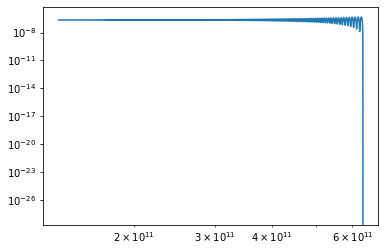

In [11]:
plt.loglog(sol.T, -sol.red_chem_B_minus_L)